# Das "Alarm"-Bayes-Netz in Python mit pomegranate

In [10]:
# notwendige imports, u.a. das pomegranate package 
import math
from pomegranate import *

Der folgende Code definiert eine Funktion, um die Kausalstruktur eines erstelltes Netzes grafisch darzustellen

In [11]:
import pygraphviz
import tempfile
import matplotlib.pyplot as plt
import matplotlib.image as matimg

def plot(model):
    G = pygraphviz.AGraph(directed=True)
    
    for state in model.states:
        G.add_node(state.name, color='red')
        
    for parent, child in model.edges:
        G.add_edge(parent.name, child.name)
        
    with tempfile.NamedTemporaryFile() as tf:
        G.draw(tf, format='png', prog='dot')
        img = matimg.imread(tf)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

## Definition des "Alarm"-Bayes-Netzes mittels pomegranate
Zunächst werden alle Wahrscheinlichkeitstabellen (CPTs) definiert.

In [12]:
# Wahrscheinlichkeitstabellen
wk_einbruch = DiscreteDistribution({'e': 0.001, 'ne': 0.999})
wk_erdbeben = DiscreteDistribution({'b': 0.002, 'nb': 0.998})
wk_alarm = ConditionalProbabilityTable([
    ['e', 'b', 'a', 0.95],
    ['e', 'b', 'na', 0.05],
    ['e', 'nb', 'a', 0.94],
    ['e', 'nb', 'na', 0.06],
    ['ne', 'b', 'a', 0.29],
    ['ne', 'b', 'na', 0.71],
    ['ne', 'nb', 'a', 0.001],
    ['ne', 'nb', 'na', 0.999]], [wk_einbruch, wk_erdbeben])
wk_john = ConditionalProbabilityTable([
    ['a', 'j', 0.9],
    ['a', 'nj', 0.1],
    ['na', 'j', 0.05],
    ['na', 'nj', 0.95]], [wk_alarm])
wk_mary = ConditionalProbabilityTable([
    ['a', 'm', 0.7],
    ['a', 'nm', 0.3],
    ['na', 'm', 0.01],
    ['na', 'nm', 0.99]], [wk_alarm])

Mit den Wahrscheinlichkeitstabellen werden die Knoten des Netzes erstellt.

In [13]:
einbruch = Node(wk_einbruch, name="Einbruch")
erdbeben = Node(wk_erdbeben, name="Erdbeben")
alarm = Node(wk_alarm, name="Alarm")
john = Node(wk_john, name="John")
mary = Node(wk_mary, name="Mary")



Es wird ein Netzwerk-Objekt erstellt und alle Knoten und die gewünschten Pfeile zwischen den Knoten nacheinander hinzugefügt.

In [14]:
network = BayesianNetwork("Alarm-BN von Judea Pearl")
network.add_states(einbruch, erdbeben, alarm, john, mary)
network.add_edge(einbruch, alarm)
network.add_edge(erdbeben, alarm)
network.add_edge(alarm, john)
network.add_edge(alarm, mary)
network.bake()

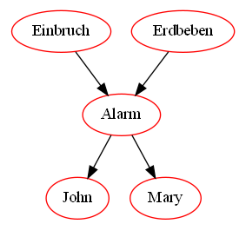

In [15]:
# Netz-Struktur grafisch anzeigen
plot(network)

## Berechnung der Beispiele von den Folien zu diesem Bayes-Netz

Berechnung einer vollständigen gemeinsamen Wahrscheinlichkeit.

In [16]:
p = network.probability([['ne','nb','a','j','m']])
p

0.0006281112600000005

Berechnung einer Abfrage-Wahrscheinlichkeit gegeben Evidenz

In [17]:
beliefs = network.predict_proba({ 'John' : 'j', 'Mary' : 'm'})
beliefs

array([{
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "e" : 0.2841718353644582,
                   "ne" : 0.7158281646355419
               }
           ],
           "frozen" : false
       }                                    ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "b" : 0.17606683840509593,
                   "nb" : 0.823933161594904
               }
           ],
           "frozen" : false
       }                                     ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "a" : 0.7606920388631566,
                   "na" : 0.2393079611368433
               }
           ],

Berechnung aller Marginalwahrscheinlichkeiten

In [18]:
m = network.marginal()
m

array([{
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "e" : 0.0010000000000004432,
                   "ne" : 0.9989999999999996
               }
           ],
           "frozen" : false
       }                                       ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "b" : 0.0020000000000004424,
                   "nb" : 0.9979999999999996
               }
           ],
           "frozen" : false
       }                                       ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "a" : 0.0025164420000009344,
                   "na" : 0.997483557999999
               }
